Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's read the csv file and it's contents

In [2]:
sales_df = pd.read_csv('/kaggle/input/online-sales-dataset/online_sales_dataset.csv')

In [3]:
sales_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [4]:
sales_df.shape

(49782, 17)

So the dataset contains 49782 rows and 17 columns.

In [5]:
sales_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Discount', 'PaymentMethod',
       'ShippingCost', 'Category', 'SalesChannel', 'ReturnStatus',
       'ShipmentProvider', 'WarehouseLocation', 'OrderPriority'],
      dtype='object')

In [6]:
sales_df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Discount,ShippingCost
count,49782.000000,49782.000000,49782.000000,44804.000000,49782.000000,47293.000000
mean,550681.239946,22.372343,47.537862,55032.871775,0.275748,17.494529
std,260703.009944,17.917774,33.479510,25913.660157,0.230077,7.220557
min,100005.000000,-50.000000,-99.980000,10001.000000,0.000000,5.000000
25%,324543.000000,11.000000,23.592500,32750.750000,0.130000,11.220000
50%,552244.000000,23.000000,48.920000,55165.000000,0.260000,17.500000
75%,776364.000000,37.000000,74.610000,77306.250000,0.380000,23.720000
max,999997.000000,49.000000,100.000000,99998.000000,1.999764,30.000000


In [7]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

**Cleaning the data**

In [8]:
check_nan = sales_df[sales_df.isna().any(axis=1)]
check_nan.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium
49,655839,SKU_1047,Office Chair,48,2020-01-03 01:00,4.74,NaN,Belgium,0.220000,Credit Card,23.11,Accessories,Online,Not Returned,UPS,London,High
62,305041,SKU_1731,Desk Lamp,45,2020-01-03 14:00,54.79,NaN,United Kingdom,0.230000,Credit Card,8.97,Accessories,In-store,Not Returned,DHL,NaN,Medium
71,672843,SKU_1953,Headphones,3,2020-01-03 23:00,99.17,NaN,United States,0.030000,paypall,11.58,Stationery,Online,Not Returned,DHL,London,Medium
103,124300,SKU_1951,Headphones,8,2020-01-05 07:00,46.19,NaN,Norway,0.100000,Bank Transfer,12.81,Stationery,In-store,Not Returned,UPS,NaN,High


In [9]:
check_nan.shape

(4978, 17)

There are 4978 rows with atleast one NaN value.

In [10]:
sales_df = sales_df.dropna()
sales_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.19,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.14,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
5,744167,SKU_1006,Office Chair,47,2020-01-01 05:00,70.16,53887.0,Sweden,0.48,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00,70.92,51445.0,Spain,0.20,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00,51.74,28879.0,United States,0.23,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00,85.25,21825.0,Portugal,0.20,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00,39.64,43199.0,United Kingdom,0.31,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium


In [11]:
check_nan = sales_df[sales_df.isna().any(axis=1)]
check_nan.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority


In [12]:
check_nan.shape

(0, 17)

In [13]:
sales_df.shape

(44804, 17)

In [14]:
sales_df.dtypes

InvoiceNo              int64
StockCode             object
Description           object
Quantity               int64
InvoiceDate           object
UnitPrice            float64
CustomerID           float64
Country               object
Discount             float64
PaymentMethod         object
ShippingCost         float64
Category              object
SalesChannel          object
ReturnStatus          object
ShipmentProvider      object
WarehouseLocation     object
OrderPriority         object
dtype: object

In [15]:
duplicate_rows = sales_df.duplicated()
duplicate_rows.sum()

0

In [16]:
sales_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.19,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.14,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
5,744167,SKU_1006,Office Chair,47,2020-01-01 05:00,70.16,53887.0,Sweden,0.48,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium


In [17]:
sales_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00,70.92,51445.0,Spain,0.20,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00,51.74,28879.0,United States,0.23,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00,85.25,21825.0,Portugal,0.20,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00,39.64,43199.0,United Kingdom,0.31,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium
49781,772215,SKU_1832,White Mug,30,2025-09-05 05:00,38.27,53328.0,France,0.10,Credit Card,9.13,Stationery,Online,Not Returned,UPS,Rome,Low


In [18]:
sales_df = sales_df.copy()
sales_df['InvoiceDate'] = pd.to_datetime(sales_df['InvoiceDate'])
sales_df['Year'] = sales_df['InvoiceDate'].dt.year
sales_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,Year
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,2020
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,19144.0,Spain,0.19,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium,2020
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High,2020
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,96586.0,Netherlands,0.14,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low,2020
5,744167,SKU_1006,Office Chair,47,2020-01-01 05:00:00,70.16,53887.0,Sweden,0.48,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00:00,70.92,51445.0,Spain,0.20,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium,2025
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00:00,51.74,28879.0,United States,0.23,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low,2025
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00:00,85.25,21825.0,Portugal,0.20,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High,2025
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00:00,39.64,43199.0,United Kingdom,0.31,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium,2025


In [19]:
sales_df.replace(to_replace='paypall',value='PayPal', inplace=True)
sales_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,Year
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,2020
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,19144.0,Spain,0.19,PayPal,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium,2020
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High,2020
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,96586.0,Netherlands,0.14,PayPal,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low,2020
5,744167,SKU_1006,Office Chair,47,2020-01-01 05:00:00,70.16,53887.0,Sweden,0.48,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00:00,70.92,51445.0,Spain,0.20,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium,2025
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00:00,51.74,28879.0,United States,0.23,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low,2025
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00:00,85.25,21825.0,Portugal,0.20,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High,2025
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00:00,39.64,43199.0,United Kingdom,0.31,PayPal,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium,2025


In [20]:
sales_df.describe()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Discount,ShippingCost,Year
count,44804.000000,44804.000000,44804,44804.000000,44804.000000,44804.000000,44804.000000,44804.000000
mean,549849.692282,24.896973,2022-11-01 02:33:43.051513344,50.622735,55032.871775,0.250474,17.484206,2022.352357
min,100005.000000,1.000000,2020-01-01 00:00:00,1.000000,10001.000000,0.000000,5.000000,2020.000000
25%,323744.750000,13.000000,2021-05-31 00:45:00,25.880000,32750.750000,0.130000,11.210000,2021.000000
50%,551099.500000,25.000000,2022-10-30 10:30:00,50.490000,55165.000000,0.250000,17.470000,2022.000000
75%,775251.750000,37.000000,2024-04-03 15:15:00,75.400000,77306.250000,0.380000,23.710000,2024.000000
max,999997.000000,49.000000,2025-09-05 05:00:00,100.000000,99998.000000,0.500000,30.000000,2025.000000
std,260681.031778,14.150006,NaN,28.596901,25913.660157,0.144349,7.218483,1.645572


In [21]:
check_nan = sales_df[sales_df.isna().any(axis=1)]
check_nan.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,Year


In [22]:
sales_df['TotalPrice'] = sales_df['UnitPrice']*sales_df['Quantity']
sales_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,Year,TotalPrice
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,2020,64.98
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,19144.0,Spain,0.19,PayPal,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium,2020,742.50
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High,2020,1426.39
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,96586.0,Netherlands,0.14,PayPal,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low,2020,1073.52
5,744167,SKU_1006,Office Chair,47,2020-01-01 05:00:00,70.16,53887.0,Sweden,0.48,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium,2020,3297.52


In [23]:
sales_df.Description.unique()

array(['White Mug', 'Headphones', 'Desk Lamp', 'Office Chair',
       'USB Cable', 'Notebook', 'Wireless Mouse', 'Blue Pen',
       'Wall Clock', 'T-shirt', 'Backpack'], dtype=object)

# Let's visualize the data # 

Question 1: 

In [24]:
res = sales_df.groupby('Year')['TotalPrice'].sum()
res

Year
2020     9941131.17
2021     9977902.43
2022     9815037.97
2023     9864834.93
2024    10039228.80
2025     6763209.76
Name: TotalPrice, dtype: float64

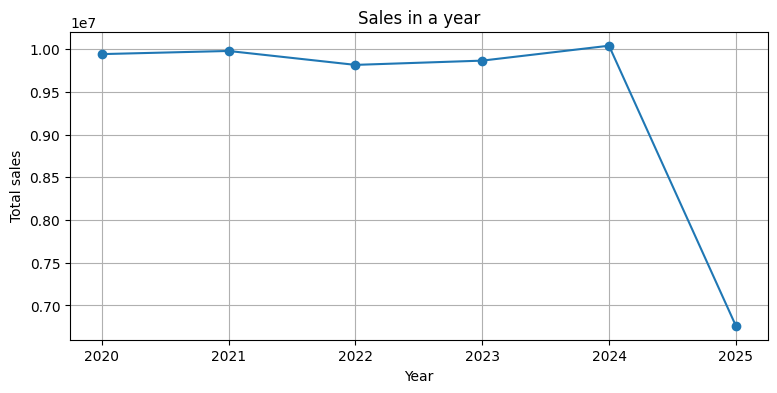

In [25]:
plt.figure(figsize=(9,4))
plt.plot(res.index, res.values, marker='o', linestyle='-');
plt.title('Sales in a year')
plt.xlabel('Year')
plt.ylabel('Total sales')
plt.grid()
plt.show()

In [26]:
des = sales_df.Description.value_counts()
des

Description
Wall Clock        4159
USB Cable         4130
Backpack          4122
Desk Lamp         4103
White Mug         4091
Office Chair      4065
Headphones        4058
T-shirt           4050
Blue Pen          4036
Notebook          4015
Wireless Mouse    3975
Name: count, dtype: int64

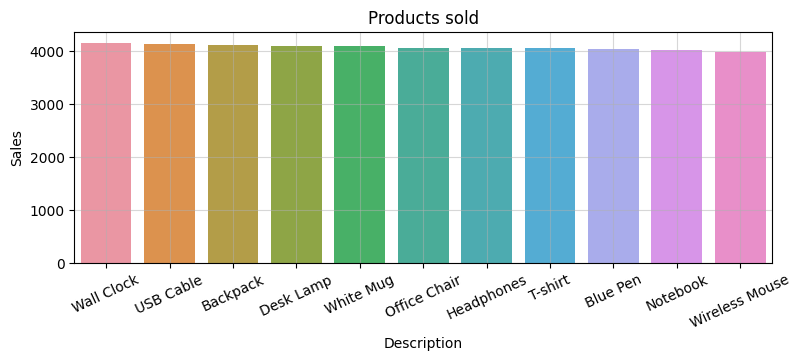

In [27]:
plt.figure(figsize=(9,3))
plt.title('Products sold')
plt.xlabel('Products')
plt.ylabel('Sales')
sns.barplot(x=des.index, y=des.values);
plt.xticks(rotation=25)
plt.grid(alpha=0.5)
plt.show()

In [28]:
country_count = sales_df.Country.value_counts()
pd.to_numeric(country_count)

Country
France            3820
Sweden            3771
Germany           3763
Netherlands       3753
Portugal          3747
Belgium           3745
Norway            3740
United Kingdom    3735
Spain             3700
Australia         3698
United States     3690
Italy             3642
Name: count, dtype: int64

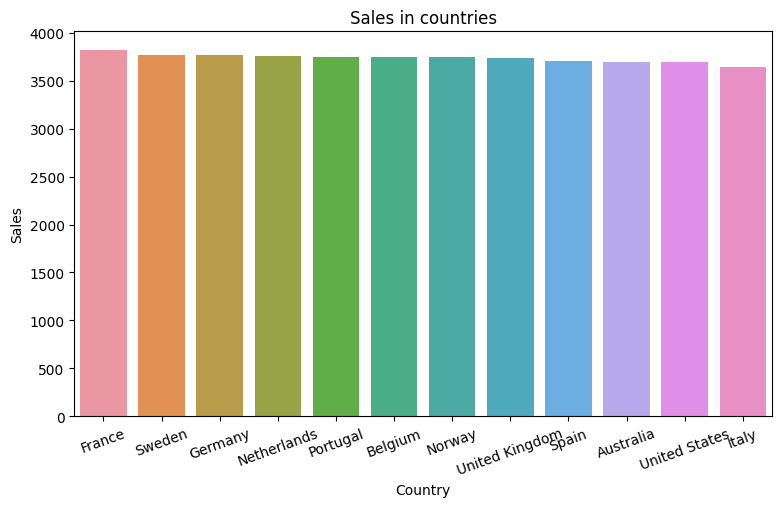

In [29]:
plt.figure(figsize=(9,5))
plt.title("Sales in countries")
plt.xlabel("Countries")
plt.ylabel("Sales")
sns.barplot(x=country_count.index, y=country_count.values);
plt.xticks(rotation=20)
plt.show()

In [30]:
category = sales_df.Category.value_counts()
category

Category
Furniture      9074
Stationery     8957
Electronics    8956
Accessories    8926
Apparel        8891
Name: count, dtype: int64

<Axes: title={'center': 'Categories of the products sold'}, xlabel='Category', ylabel='Sales'>

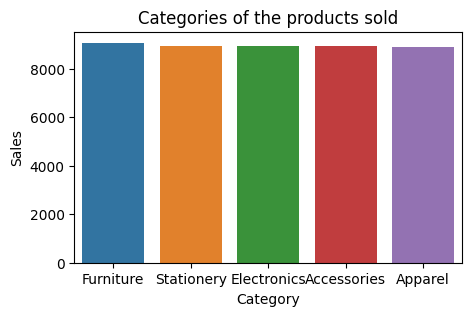

In [31]:
plt.figure(figsize=(5,3))
plt.title("Categories of the products sold")
plt.xlabel("Category")
plt.ylabel("Sales")
sns.barplot(x=category.index, y=category.values)

In [32]:
sales_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,Year,TotalPrice
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,2020,64.98
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,19144.0,Spain,0.19,PayPal,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium,2020,742.50
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High,2020,1426.39
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,96586.0,Netherlands,0.14,PayPal,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low,2020,1073.52
5,744167,SKU_1006,Office Chair,47,2020-01-01 05:00:00,70.16,53887.0,Sweden,0.48,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium,2020,3297.52


In [33]:
pay_method = sales_df.PaymentMethod.value_counts()
pay_method

PaymentMethod
Bank Transfer    15086
Credit Card      14907
PayPal           14811
Name: count, dtype: int64

In [34]:
return_status = sales_df.ReturnStatus.value_counts()
return_status

ReturnStatus
Not Returned    40417
Returned         4387
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, 'Not Returned'), Text(1, 0, 'Returned')])

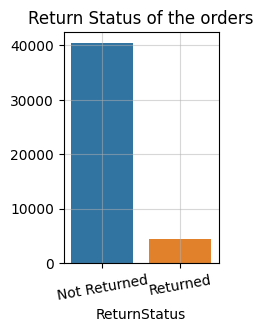

In [35]:
plt.figure(figsize=(2,3))
plt.title("Return Status of the orders")
sns.barplot(x=return_status.index, y=return_status.values)
plt.grid(alpha=0.5)
plt.xticks(rotation=10)